# Warning
This notebook is under development- please use to evaluate entropy notebooks, and try an approach of using multiple entropy levels

# Experiments on pulling off ECG lead

## Import libraries

In [1]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import collections
import math
sys.path.insert(0, '../resurfemg')
import helper_functions as hf

# Set a collection place for experiments

In [2]:
from config import Config

config = Config()

In [3]:
# get new changes in our library i.e. the tmsisdk
import sys
sys.path.insert(0, '../resurfemg')

from tmsisdk_lite import Poly5Reader

C:\Users\makeda\anaconda3\envs\emgandash\lib\site-packages\mne\fixes.py:321: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(scipy.__version__) >= '1.1':
C:\Users\makeda\anaconda3\envs\emgandash\lib\site-packages\mne\fixes.py:1134: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(numba.__version__) < LooseVersion('0.40'):
C:\Users\makeda\anaconda3\envs\emgandash\lib\site-packages\mne\fixes.py:1134: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(numba.__version__) < LooseVersion('0.40'):


In [4]:
# do not rerun this cell
big_data_list= []

Below change the path to the root directory where you are keeping your EMGs and ventilator "Draeger" files

# Reruns should be done from this cell as the start

In [5]:
root_emg_directory = config.get_directory('root_emg_directory')

In [6]:
emg_pattern = os.path.join(root_emg_directory, '**/*.Poly5')
emg_and_draeger_files = glob.glob(emg_pattern, recursive=True)

emg_files = []
draeger_files = []

for file in emg_and_draeger_files:
    if 'Draeger' in file:
        draeger_files.append(file)
    else:
        emg_files.append(file)

Now you can pick a file from the list, which have been numbered.

In [7]:
list_of_numbers_strung = []
for i in range(len(emg_files)):
    list_of_numbers_strung.append(str(i))


btn = widgets.Dropdown(
    options=list_of_numbers_strung,
    value='0',
    description='Picked File:',
    disabled=False,
)
display(btn)

Dropdown(description='Picked File:', options=('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '1…

In [8]:
number_chosen = int(btn.value)
file_chosen = emg_files[number_chosen] 
print("The file you chose is:",file_chosen)

The file you chose is: C:/Projects/ReSurfEMG/not_pushed/topspin_data_anonymized\M001\001\EMG_recording.Poly5


In [9]:
data_emg = Poly5Reader(file_chosen)
data_samples= data_emg.samples
emg_sample_rate = data_emg.sample_rate
converted_to_seconds =  []
converted_to_samples = []
for i in range(len(data_samples[0])):
    converted_to_seconds.append(i/emg_sample_rate)
    converted_to_samples.append(i)

Reading file  C:/Projects/ReSurfEMG/not_pushed/topspin_data_anonymized\M001\001\EMG_recording.Poly5
	 Number of samples:  172576 
	 Number of channels:  3 
	 Sample rate: 2048 Hz
Done reading data.


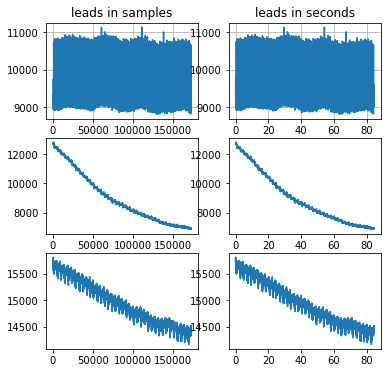

In [10]:
%matplotlib inline
# set up plotn
x = data_samples
fig, axis = plt.subplots(nrows = 3, ncols = 2, figsize=(6, 6))
#ax.set_ylim([-4, 4])
axis[0,0].grid(True)
axis[0,0].plot(x[0])
axis[0,0].set(title='leads in samples')
axis[1,0].plot(x[1])
axis[2,0].plot(x[2])
axis[0,1].set(title='leads in seconds')
axis[0,1].grid(True)
axis[0,1].plot(converted_to_seconds,x[0])
axis[1,1].plot(converted_to_seconds,x[1])
axis[2,1].plot(converted_to_seconds,x[2])

That is the whole unfiltered EMG, but you probably want to examine a part. You will also want to examine something filtered down to only the EMG components. Therefore we will filter off only the EMG components with an ICA in addtion to the filter we will play with.

Now you can filter down to which part you want to see. 

Do you want to cut and see the file in samples or seconds?

In [11]:
y_axis = widgets.Dropdown(
    options=["Samples","Seconds"],
    value='Samples',
    description="Select View Option",
    disabled=False,
)
display(y_axis)


Dropdown(description='Select View Option', options=('Samples', 'Seconds'), value='Samples')

In [12]:
time_view= y_axis.value
time_view

'Samples'

In [13]:
# type in start number and press return for it to update
start = input()

0


In [14]:
# type in end number and press return for it to update
end= input()

20000



Do we want to?
# Add warning cell if end is less than start, or numbers are out of range?

In [15]:
start_s = float(start)* emg_sample_rate
end_s = float(end)*emg_sample_rate

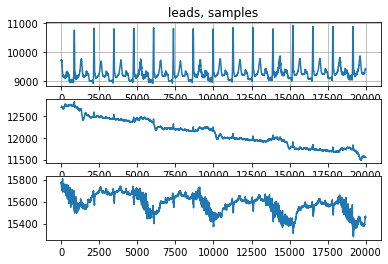

In [16]:
if time_view == 'Samples':
    # nox examine at a certain scale- from point a to b as samples
    x = data_samples
    fig, (ax_1,ax_2,ax_3) = plt.subplots(nrows = 3, figsize=(6, 4))
    ax_1.grid(True)
    ax_1.plot(x[0][int(start):int(end)])
    ax_1.set(title='leads, samples')
    ax_2.plot(x[1][int(start):int(end)])
    ax_3.plot(x[2][int(start):int(end)])
    
if time_view == 'Seconds':
    # nox examine at a certain scale- from point a to b as samples
    x_for_secs = data_samples
    
    converter_for_sample_number =90
    
    y = converted_to_seconds
    fig, (ax_1,ax_2,ax_3) = plt.subplots(nrows = 3, figsize=(6, 4))
    ax_1.grid(True)
    ax_1.plot(y[int(start_s):int(end_s)],x[0][int(start_s):int(end_s)])
    ax_1.set(title='leads, seconds')
    ax_2.plot(y[int(start_s):int(end_s)],x[1][int(start_s):int(end_s)])
    ax_3.plot(y[int(start_s):int(end_s)],x[2][int(start_s):int(end_s)])
    

    

Happy with your selection? If not redo, then we can see how the filter the selection in a basic pipleline before extracint entropy.

In [17]:

def pick_highest_correlation_array(components_tuple, ecg_lead):
    """Here we have a function that takes a tuple with the two parts
    of ICA and the array containing the ECG recording, and finds the
    ICA component with the highest similarity to the ECG.
    Data should not have been finally filtered to envelope level

    :param components_tuple: tuple of two arrays representing different signals
    :type components_tuple: Tuple[~numpy.ndarray, ~numpy.ndarray]

    :param ecg_lead: array containing the ECG recording
    :type ecg_lead: numpy.ndarray

    :returns: Array with the highest correlation coefficient
     to the ECG lead (should usually be the  ECG)
    :rtype: ~numpy.ndarray
    """
    c0 = components_tuple[0]
    c1 = components_tuple[1]
    corr_tuple = np.row_stack((ecg_lead, c0, c1))
    corr_matrix = abs(np.corrcoef(corr_tuple))

    # get the component with the highest correlation to ECG
    # the matriz is symmetric, so we can check just the first row
    # the first coefficient is the autocorrelation of the ECG lead,
    # so we can check row 1 and 2

    hi_index = np.argmax(corr_matrix[0][1:])
    ecg_component = components_tuple[hi_index]

    return ecg_component



In [20]:
def get_heart_signal(our_chosen_samples, heart_lead_number): 
    cut_file_data = hf.bad_end_cutter_for_samples(our_chosen_samples, percent_to_cut=3, tolerance_percent=5)
    bd_filtered_file_data = hf.emg_bandpass_butter_sample(cut_file_data, 5, 1000, 2048, output='sos')
    # step 3 end-cutting again to get rid of filtering artifacts
    re_cut_file_data = hf.bad_end_cutter_for_samples(bd_filtered_file_data, percent_to_cut=3, tolerance_percent=5)
    # skip step4 and do step 5 ICA
    components = hf.compute_ICA_two_comp(re_cut_file_data)
    #     the picking step -pick off components
    fit_heart_lead = our_chosen_samples[heart_lead_number][:len(components[0])]
#     import pdb
#     pdb.set_trace()
    heart= pick_highest_correlation_array(components,fit_heart_lead)
    emg= hf.pick_lowest_correlation_array(components,fit_heart_lead)
    return heart, emg

C:\Users\makeda\anaconda3\envs\emgandash\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


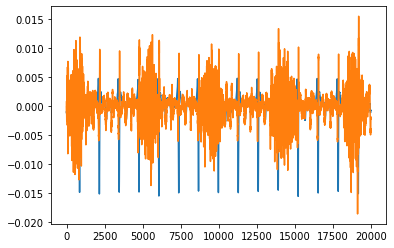

In [21]:
#heart = get_heart_signal(data_samples,0)
heart_and_emg = get_heart_signal(data_samples,0)
plt.plot(heart_and_emg[0][0:20000])
plt.plot(heart_and_emg[1][0:20000])

So the question is did we pull a better or worse signal than simply using the lead. It may vary depending upon sample but let's look

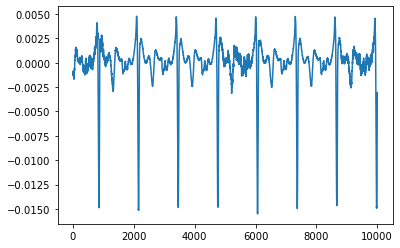

In [22]:
plt.plot(heart_and_emg[0][0:10000])


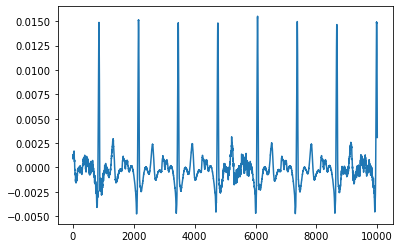

In [23]:
# ok that needs to flip so we can be objective
plt.plot(-heart_and_emg[0][0:10000])

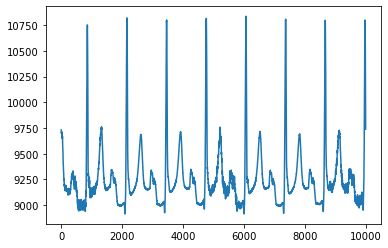

In [24]:
plt.plot(data_samples[0][0:10000])

I am not sure which is better?